In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y%m%d%H')
train=pd.read_csv('train.csv',parse_dates=[0],index_col='ID',date_parser=dateparse)
train.head()

,Count
ID,
2011-10-01 00:00:00,135
2011-10-01 01:00:00,96
2011-10-01 02:00:00,111
2011-10-01 03:00:00,102
2011-10-01 04:00:00,54


In [3]:
train.index

DatetimeIndex(['2011-10-01 00:00:00', '2011-10-01 01:00:00',
               '2011-10-01 02:00:00', '2011-10-01 03:00:00',
               '2011-10-01 04:00:00', '2011-10-01 05:00:00',
               '2011-10-01 06:00:00', '2011-10-01 07:00:00',
               '2011-10-01 08:00:00', '2011-10-01 09:00:00',
               ...
               '2013-03-31 14:00:00', '2013-03-31 15:00:00',
               '2013-03-31 16:00:00', '2013-03-31 17:00:00',
               '2013-03-31 18:00:00', '2013-03-31 19:00:00',
               '2013-03-31 20:00:00', '2013-03-31 21:00:00',
               '2013-03-31 22:00:00', '2013-03-31 23:00:00'],
              dtype='datetime64[ns]', name='ID', length=13152, freq=None)

In [77]:
test=pd.read_csv('test.csv',parse_dates=[0],index_col='ID',date_parser=dateparse)
test.head()

,Count
ID,
2013-04-01 00:00:00,NaN
2013-04-01 01:00:00,NaN
2013-04-01 02:00:00,NaN
2013-04-01 03:00:00,NaN
2013-04-01 04:00:00,NaN


In [5]:
ts=train["Count"]
ts.head()

ID
2011-10-01 00:00:00    135
2011-10-01 01:00:00     96
2011-10-01 02:00:00    111
2011-10-01 03:00:00    102
2011-10-01 04:00:00     54
Name: Count, dtype: int64

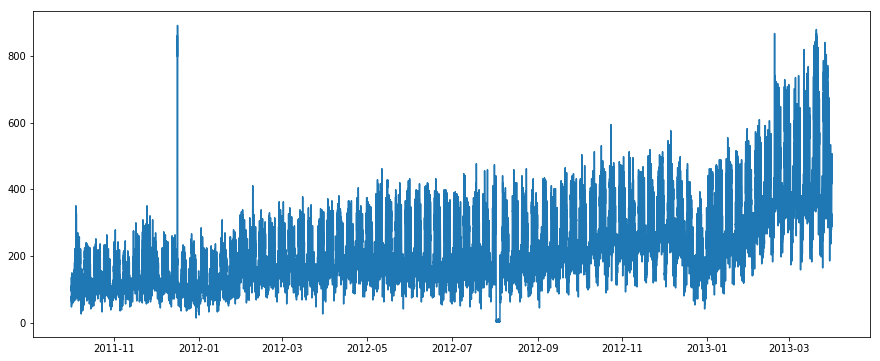

In [6]:
plt.plot(ts)
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


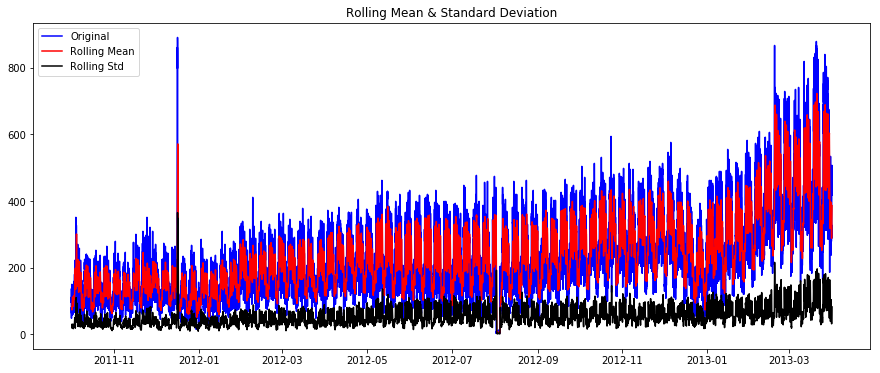

Results of Dickey-Fuller Test:
Test Statistic                -8.719046e+00
p-value                        3.425034e-14
#Lags Used                     4.100000e+01
Number of Observations Used    1.311000e+04
Critical Value (1%)           -3.430849e+00
Critical Value (5%)           -2.861760e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


In [8]:
test_stationarity(ts)

In [9]:
'''
for df in test,train:
    df["hour"]=df['ID'].apply(lambda x: x[-2:])
    df["date"]=df['ID'].apply(lambda x: x[-4:-2])
    df["month"]=df['ID'].apply(lambda x: x[-6:-4])
    df["year"]=df['ID'].apply(lambda x: x[0:4])

train.head()
'''

'\nfor df in test,train:\n    df["hour"]=df[\'ID\'].apply(lambda x: x[-2:])\n    df["date"]=df[\'ID\'].apply(lambda x: x[-4:-2])\n    df["month"]=df[\'ID\'].apply(lambda x: x[-6:-4])\n    df["year"]=df[\'ID\'].apply(lambda x: x[0:4])\n\ntrain.head()\n'

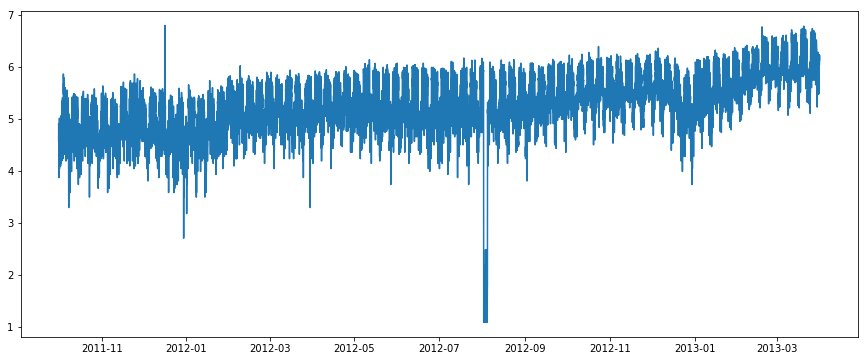

In [10]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  """Entry point for launching an IPython kernel.


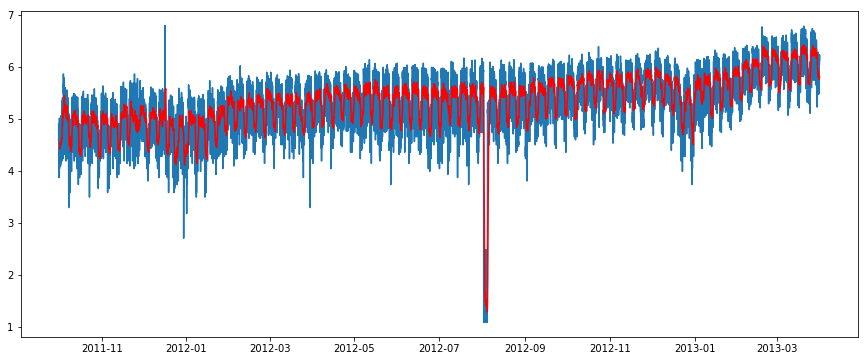

In [11]:
moving_avg = pd.rolling_mean(ts_log,20)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [12]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff

ID
2011-10-01 00:00:00         NaN
2011-10-01 01:00:00         NaN
2011-10-01 02:00:00         NaN
2011-10-01 03:00:00         NaN
2011-10-01 04:00:00         NaN
2011-10-01 05:00:00         NaN
2011-10-01 06:00:00         NaN
2011-10-01 07:00:00         NaN
2011-10-01 08:00:00         NaN
2011-10-01 09:00:00         NaN
2011-10-01 10:00:00         NaN
2011-10-01 11:00:00         NaN
2011-10-01 12:00:00         NaN
2011-10-01 13:00:00         NaN
2011-10-01 14:00:00         NaN
2011-10-01 15:00:00         NaN
2011-10-01 16:00:00         NaN
2011-10-01 17:00:00         NaN
2011-10-01 18:00:00         NaN
2011-10-01 19:00:00    0.292181
2011-10-01 20:00:00    0.166610
2011-10-01 21:00:00    0.273761
2011-10-01 22:00:00    0.135838
2011-10-01 23:00:00    0.108708
2011-10-02 00:00:00    0.370026
2011-10-02 01:00:00    0.437218
2011-10-02 02:00:00   -0.255149
2011-10-02 03:00:00   -0.137366
2011-10-02 04:00:00   -0.344486
2011-10-02 05:00:00   -0.334246
                         ...   
2013-

In [13]:
ts_log_moving_avg_diff.head()

ID
2011-10-01 00:00:00   NaN
2011-10-01 01:00:00   NaN
2011-10-01 02:00:00   NaN
2011-10-01 03:00:00   NaN
2011-10-01 04:00:00   NaN
Name: Count, dtype: float64

In [14]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff

ID
2011-10-01 19:00:00    0.292181
2011-10-01 20:00:00    0.166610
2011-10-01 21:00:00    0.273761
2011-10-01 22:00:00    0.135838
2011-10-01 23:00:00    0.108708
2011-10-02 00:00:00    0.370026
2011-10-02 01:00:00    0.437218
2011-10-02 02:00:00   -0.255149
2011-10-02 03:00:00   -0.137366
2011-10-02 04:00:00   -0.344486
2011-10-02 05:00:00   -0.334246
2011-10-02 06:00:00   -0.133300
2011-10-02 07:00:00    0.022215
2011-10-02 08:00:00   -0.115022
2011-10-02 09:00:00   -0.446729
2011-10-02 10:00:00    0.074822
2011-10-02 11:00:00    0.075579
2011-10-02 12:00:00   -0.005315
2011-10-02 13:00:00    0.202083
2011-10-02 14:00:00   -0.361328
2011-10-02 15:00:00    0.326815
2011-10-02 16:00:00   -0.037098
2011-10-02 17:00:00    0.068601
2011-10-02 18:00:00    0.280588
2011-10-02 19:00:00    0.055857
2011-10-02 20:00:00    0.350144
2011-10-02 21:00:00    0.418661
2011-10-02 22:00:00    0.011210
2011-10-02 23:00:00    0.513792
2011-10-03 00:00:00    0.075633
                         ...   
2013-

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


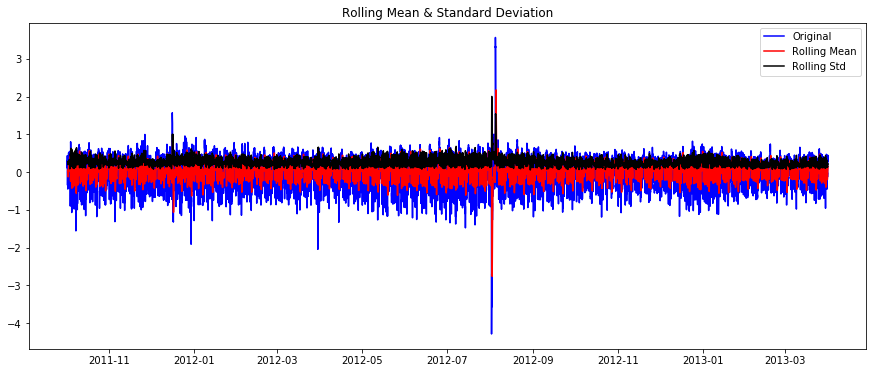

Results of Dickey-Fuller Test:
Test Statistic                -1.793727e+01
p-value                        2.869081e-30
#Lags Used                     3.500000e+01
Number of Observations Used    1.309700e+04
Critical Value (1%)           -3.430849e+00
Critical Value (5%)           -2.861761e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


In [15]:
test_stationarity(ts_log_moving_avg_diff)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


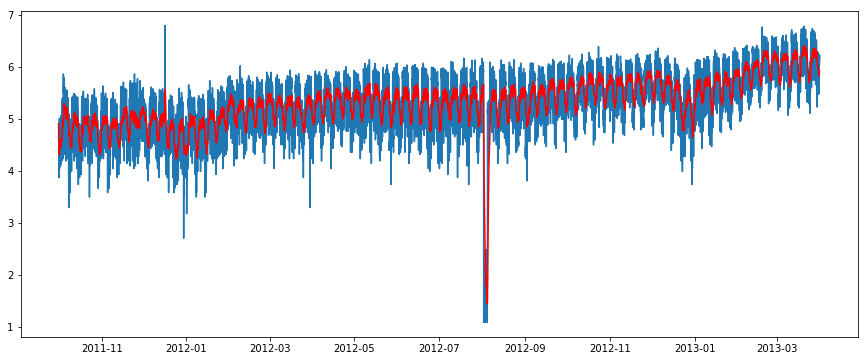

In [16]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


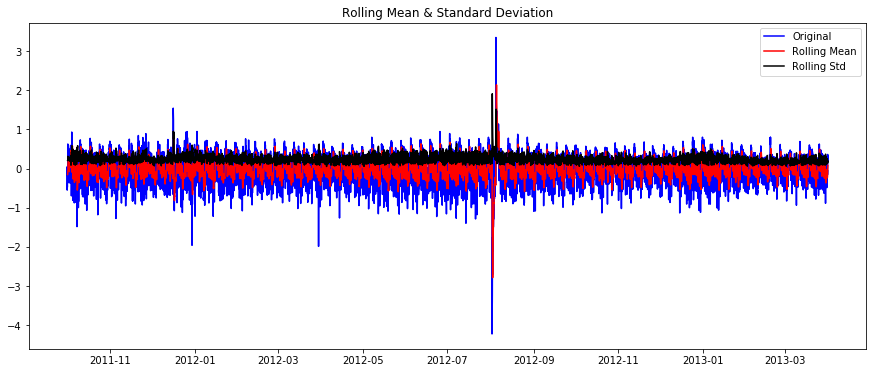

Results of Dickey-Fuller Test:
Test Statistic                -1.854367e+01
p-value                        2.096263e-30
#Lags Used                     3.800000e+01
Number of Observations Used    1.311300e+04
Critical Value (1%)           -3.430849e+00
Critical Value (5%)           -2.861760e+00
Critical Value (10%)          -2.566887e+00
dtype: float64


In [17]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

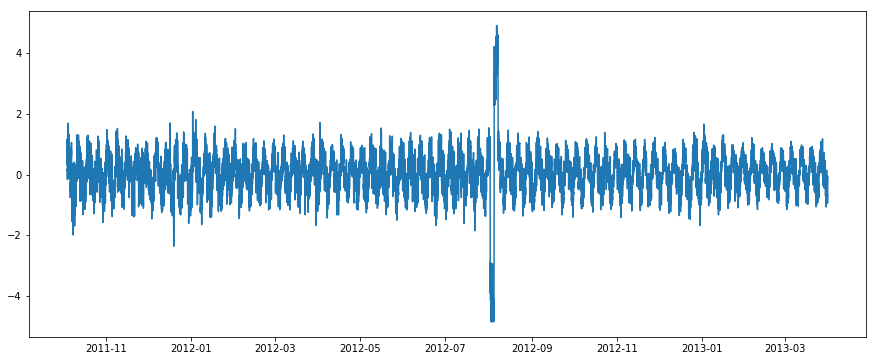

In [18]:
ts_log_diff = ts_log - ts_log.shift(69)
plt.plot(ts_log_diff)
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


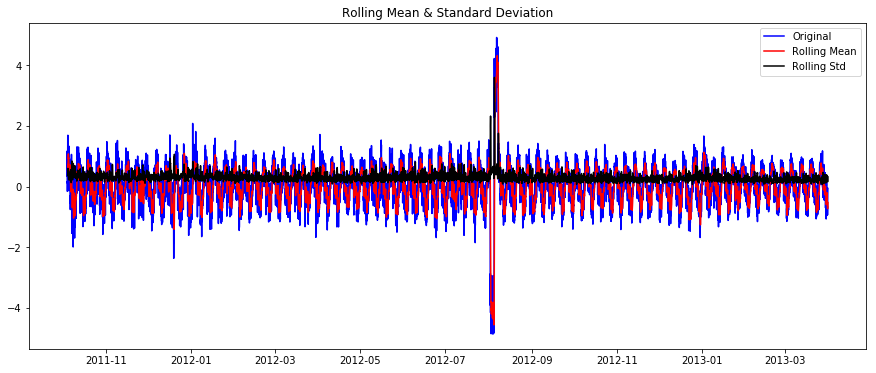

Results of Dickey-Fuller Test:
Test Statistic                   -19.634735
p-value                            0.000000
#Lags Used                        41.000000
Number of Observations Used    13041.000000
Critical Value (1%)               -3.430852
Critical Value (5%)               -2.861762
Critical Value (10%)              -2.566888
dtype: float64


In [19]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

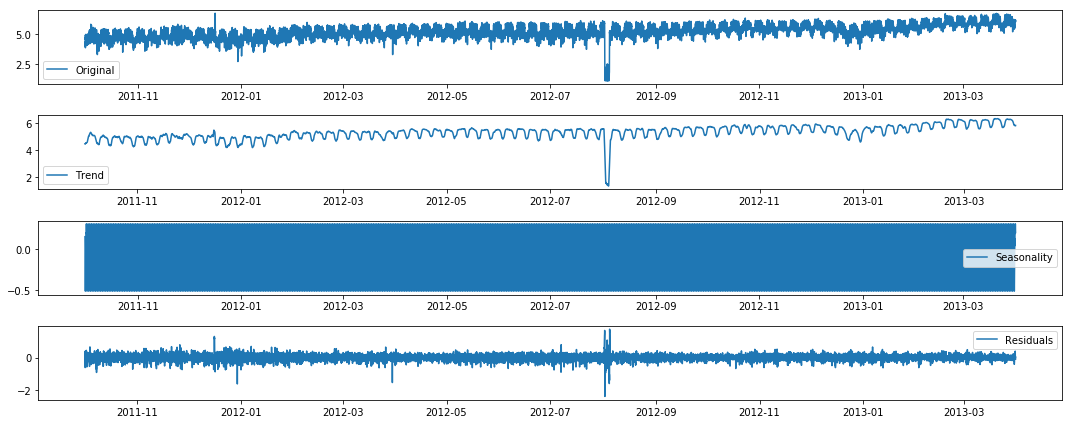

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()
  


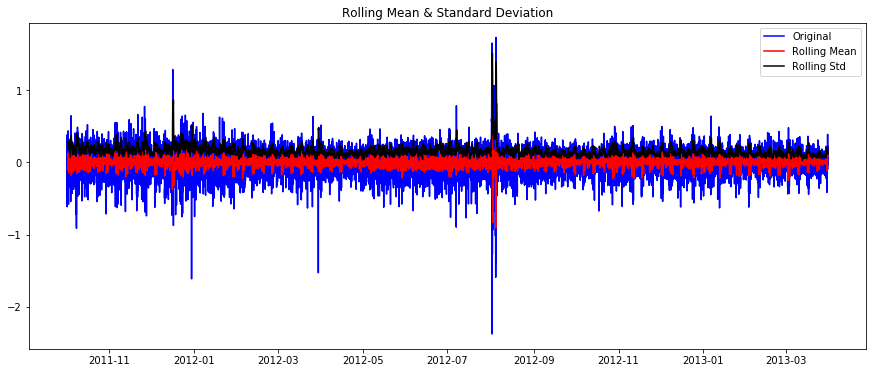

Results of Dickey-Fuller Test:
Test Statistic                   -26.521664
p-value                            0.000000
#Lags Used                        38.000000
Number of Observations Used    13089.000000
Critical Value (1%)               -3.430850
Critical Value (5%)               -2.861761
Critical Value (10%)              -2.566888
dtype: float64


In [21]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)



In [23]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

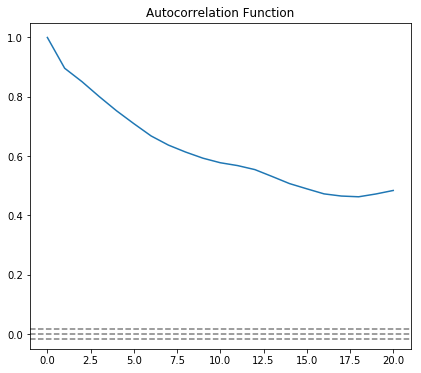

In [24]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.show()

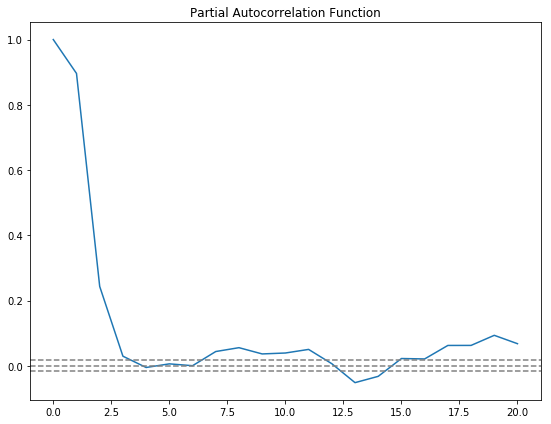

In [25]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [26]:
from statsmodels.tsa.arima_model import ARIMA

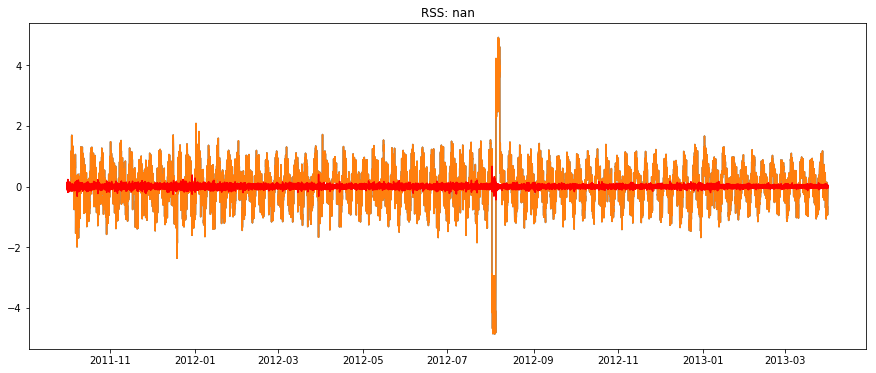

In [28]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))
plt.show()

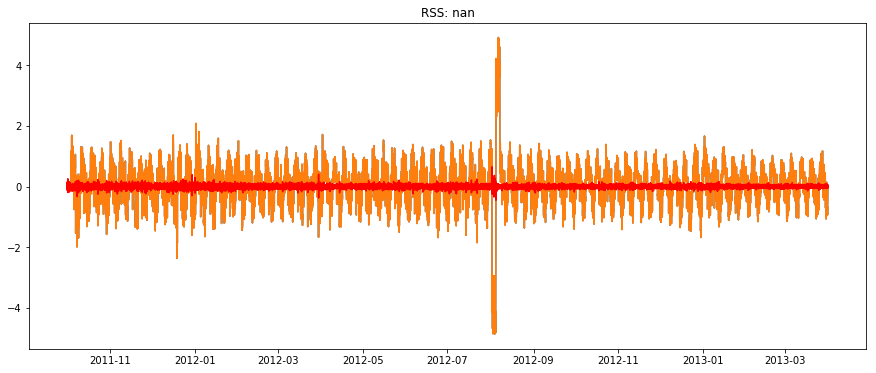

In [30]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


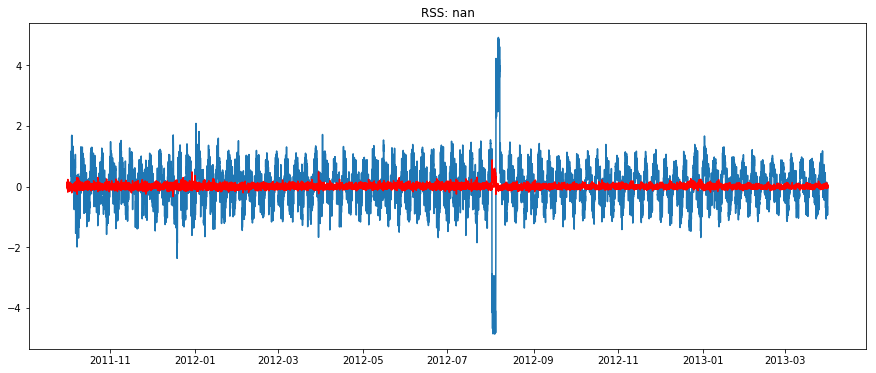

In [38]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=0)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plt.show()

In [71]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.forecast(len(test))[0], copy=True)
print(predictions_ARIMA_diff)

0       6.145587
1       6.135002
2       6.133806
3       6.129862
4       6.127168
5       6.124372
6       6.121898
7       6.119585
8       6.117466
9       6.115510
10      6.113711
11      6.112055
12      6.110532
13      6.109131
14      6.107844
15      6.106662
16      6.105576
17      6.104580
18      6.103667
19      6.102831
20      6.102065
21      6.101364
22      6.100724
23      6.100140
24      6.099607
25      6.099122
26      6.098681
27      6.098281
28      6.097919
29      6.097592
          ...   
2898    6.375219
2899    6.375318
2900    6.375416
2901    6.375515
2902    6.375614
2903    6.375712
2904    6.375811
2905    6.375909
2906    6.376008
2907    6.376107
2908    6.376205
2909    6.376304
2910    6.376402
2911    6.376501
2912    6.376599
2913    6.376698
2914    6.376797
2915    6.376895
2916    6.376994
2917    6.377092
2918    6.377191
2919    6.377290
2920    6.377388
2921    6.377487
2922    6.377585
2923    6.377684
2924    6.377782
2925    6.3778

In [72]:
predict=np.exp(predictions_ARIMA_diff)
predict.head()

0    466.653598
1    461.739846
2    461.188062
3    459.372849
4    458.136817
dtype: float64

In [79]:
sub=pd.read_csv('test.csv')
sub['Count']=pd.DataFrame(predict)

In [82]:
sub.to_csv('arima.csv',index=False)

In [14]:
test.head()

,ID,hour,date,month,year,Count
0,2013040100,0,1,4,2013,518.1
1,2013040101,1,1,4,2013,518.4
2,2013040102,2,1,4,2013,475.2
3,2013040103,3,1,4,2013,428.7
4,2013040104,4,1,4,2013,331.8


In [16]:
sub=test.drop(['hour','date','month','year'],axis=1)

In [17]:
sub.to_csv('prediction.csv',index=False)